# PYTHON: DEEP DIVE
- Bonus Study Group 01/03/20


# TOPICS

- Review OOP vocabulary from sect 10's SG


- **Dictionaries are your friend!**
    - Constructing Dictionaries `{k:v}` vs `dict(k=v)`
    - Iterating With Dictionaries
    - Dictionary Comprehensions
    - The `kwargs` and the  `**` operator
    
- **Unpacking/packing with `*` and **

- `filter`,`map` 
    
- **Closures:**
    - What is a closure?
    - What happens if we return a closure from a function instead of the result?
- **Decorators**
    - `@interact` example

- **ACTIVITY: Writing Decorator Timer**
    - Fixing docstrings using `from functools import wraps`
    

- **Deeper dive into Classes/Objects**
    - `help(obj)` vs `dir(obj)`
    - special methods/properties (`__repr__(),__str__(),__call__(),__version__(),__name__()`)
    - ~~Methods: vs Bound Methods vs Static Methods~~
    - Properties vs Attributes 
    

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.6 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


['[i] Pandas .iplot() method activated.']


# OOP VOCABULARY


- "Object" is an instance of a template class that currently exists in memory
- "Calling" a function: 
    - When we use `( )` with a function we are calling it.

- **Function:**  Codes that works on external data in a useful way. 

- Parameters: the defined data/varaibles that are passed accepted by a function
- Argument: the actual variable/value passed in for a parameter
- Positional Argument:
    - The first arguments required
    - their id is determined by their order
- Keyword/default Arguments:
    - arugments that have a defined default value
    - must come after positional arguments

<br><br>
- **Class:** Template/blue print.
- Instance: An object built from the class blueprint
- Attribute: A variable stored inside an object. 
- Method: Functions are stored inside an object.
    - Objects always pass themselves into a method, so we used `self` to account for this.
- Private Attributes/Methods: they start with _ and are hidden from the user. They can be updated using getting and setting functions.
- Getters/Setters:
    - Methods for retreiving or changing private attributes

- "dunders" = double underscores __ 

## NEW VOCAB WORDS:


- expressions:
    - the actual code to be run.

- evaluating expressions:
    - Python executes the code,grabs the data from memory
    

- operators: special symbols with assigned functions in python (see bottom section on Operators for examples)


- iterables: Any sequence type that we can iterate over (lists, tuples, dictionaries)
- iterators: Functions that are used to iterate through a sequence, but do not return an output unless collected by an external function like list(), tuple().
    - Examples are `filter`,`map`,`zip`

- Packing/unpacking:
    - Packing is inserted values into an iterable. 
    - Unpacking is extracting/slicing the values from an iterable.
    


- 




# Evaluating Expressions: How objects/variables exist in python


- Each object, variable,function, class is assigned a location in PC's memory and given a name that points to the objects address in memory.

- When we create variables/objects from another variable/objects, _sometimes_ an _additional_ memory address is created for the new copy of the object with its own name pointing to its address. 

- `.copy()` is not just a pandas method, but actually attached to _any_ iterable

- When python **evaluates** a line of code containing a `=`, the variables are **passed as POSITIONAL arguments to a behind-the-scene function** that then spits out the product and assigns it to a new name.



- So the **right side of the `=` is evaluated FIRST** before entering the hidden function that produces and assigns the output to the variables on the left of `=`

```python

## So what does that mean?
a = 1
b = 3
print(f"a={a},b={b}")
b,a = a,b
print(f"a={a},b={b}")
```

- When python **EVALUATES** a line of code, it uses the variable names to load in the actual data stored in memory.

In [1]:
## So what does that mean?
a = 1
b = 3
print(f"a={a},b={b}")

a=1,b=3


In [2]:
b,a = a,b
print(f"a={a},b={b}")

a=3,b=1


# DICTIONARIES

## Dictionary Methods

- Iterating throught a dict:
    - `dict.items()`
    - `dict.keys()`
    - `dict.values()`
    - `**dict` vs `*dict`



In [14]:
# Constructing dictionaries
d1=dict(p=1,y=2)
d2 = {'t':3,'h':4}
d3 = {'h':5,'o':6,'n':7}


## . Can iterate through the keys and values
for k,v in d3.items():
    print(k,v)
print('---'*3)

new_dict = {**d1,**d2,**d3}
print(new_dict)

h 5
o 6
n 7
---------
{'p': 1, 'y': 2, 't': 3, 'h': 5, 'o': 6, 'n': 7}


In [9]:
## iterate through just the keys
for k in d3.keys():
    print(k)
print()
for what in d3:
    print(what)
print()
print([*d3])

h
o
n

h
o
n

['h', 'o', 'n']


In [8]:
## Iterate through just the values
print('---'*3)
for v in d3.values():
    print(v)

---------
5
6
7


- Setting Values
    - `dict[k] = 5`
    - `dict.setdefault(k,5)`

    

In [18]:
d1['b']= 6
d1

{'p': 1, 'y': 2, 'b': 6}

#### Setting values for keys ONLY if they do not exist with `.setdefault()`

In [20]:
## Set default will add a key if it is not present
## THIS CELL WILL CASE AN ERROR BECAUSE 'k3' DOESN'T EXIST
d = dict(k1=2,k2=6)
d['k3']

KeyError: 'k3'

In [21]:
## Set default will NOT override a pre-existing key
d = dict(k1=2,k2=6,k3=7)
d.setdefault('k3','Return Me')
d['k3']

7

In [24]:
## Set default will NOT override a pre-existing key
d = dict(k1=2,k2=6)
[d.setdefault(k,'Return Me')  for k in ['a','b','c','k1']]
d#['k3']

{'k1': 2, 'k2': 6, 'a': 'Return Me', 'b': 'Return Me', 'c': 'Return Me'}

- Retrieving Value:
    - `dict.get(k)` vs `dict[k]`

- Removing / Extracting Entries
    - `dict.pop(k)` vs `del dict[k]`
    - `dict.clear()`
    
- Merging Dictionaries:
    - `d1.update(d2)`
        - for every (k,v) in d2"
            - if k is NOT in d1, insert (k,v) into d1
            - if k IS in d1, updates value of k in d1
    - Use `**` operator:
        - `combined_d = {**d1,**d2}`
    
- Updating Dictionaries
    - `d1.update(key1=new_value1,new_key2=new_value2)`


#### Retrieving Keys that do not exist

In [25]:
## Slicing a key that doesn't exist throws an error
d = dict(k1=2,k2=6)
d['k3']

KeyError: 'k3'

In [26]:
## Using dict.get(K) for a key that doesn't exist WON"T throw an error.
d = dict(k1=2,k2=6)
## But it also doesn't RETURN anything.
d.get('k3')

In [27]:
## We can add a default value to return to .get 
d = dict(k1=2,k2=6)
## But it also doesn't RETURN anything.
d.get('k3','this instead')

'this instead'

In [33]:
# MERGING
d1=dict(p=1,y=2)
d2 = {'t':3,'h':4}
d3 = {'h':5,'o':6,'n':7}
print(d1,end='\n\n')
print()
d1.update(d2)

print(d1,end='\n\n')
d1.update(d3)
print(d1)

{'p': 1, 'y': 2}


{'p': 1, 'y': 2, 't': 3, 'h': 4}

{'p': 1, 'y': 2, 't': 3, 'h': 5, 'o': 6, 'n': 7}


# UNPACKING



- What objects are *packed*?
    - Tuples/lists/strings
    - any **iterables**

- What is **unpacking**?
    - Splitting packed values into invidiual variables

- Python Notation for Tuples is based on the `,` moreso than the parentheses`(`,`)`
- `1,2,3` is functionally equivalent to `(1,2,3)`
- We can unpack on the left side of an `=` operator

```python

a,b,c = [1,2,3]

abc_dict ={'a':1,'b':2,'c':3}
val_a, val_b, val_c = abc_dict.values()
```

In [1]:
a=1,2,3
type(a)

tuple

In [35]:
## So what does that mean?
a = 1
b = 3
print(f"a={a},b={b}")

## We can swap variable names 
b,a = a,b

print(f"a={a},b={b}")

a=1,b=3
a=3,b=1


## EXTENDED UNPACKING (`*` and `**`)

- `*` and `**` operators added python 3.5+

- `*` can be used on left AND right of assignment (`=`)

- `**` can't be used on the left hand sign of an assignement (`=`)

#### using *args on the **left** of an `=`

In [3]:
## MAKE EXAMPLE LIST
l = list(range(7))
print(l,end='\n'+'---'*20+'\n')


## SLICE FIRST AND ALL ELSE LONG WAY
a = l[0]
b = l[1:]
print(a)
print(b);

[0, 1, 2, 3, 4, 5, 6]
------------------------------------------------------------
0
[1, 2, 3, 4, 5, 6]


In [4]:
## USE *b to catch all other outputs
a,*b = l
print(a)
print(b)

0
[1, 2, 3, 4, 5, 6]


In [5]:
## USE *b to catch all other outputs
*b,a = l
print(a)
print(b)

6
[0, 1, 2, 3, 4, 5]


In [6]:
## Using *b to catch the outputs in the middle
l = list(range(7))

print(l,end='\n'+'---'*20+'\n')

a,*b,c,d= l
print(f"a:{a}")
print(f"b:{b}")
print(f"c:{c}")
print(f"d:{d}")

[0, 1, 2, 3, 4, 5, 6]
------------------------------------------------------------
a:0
b:[1, 2, 3, 4]
c:5
d:6


#### Using `*` on right of `=`


In [8]:
list1=[1,2,3,6]
list2=[6,7,8,9]
list1.extend(list2)
list1

[1, 2, 3, 6, 6, 7, 8, 9]

In [9]:
## Unpacking into new list
list1=[1,2,3,6]
list2=[6,7,8,9]
l = [*list1,*list2]
l

[1, 2, 3, 6, 6, 7, 8, 9]

## Unpacking Dictionaries/keys

In [10]:
# Constructing dictionaries
d1=dict(p=1,y=2)
d2 = {'t':3,'h':4}
d3 = {'h':5,'o':6,'n':7}


## . Can iterate through the keys and values
for k,v in d3.items():
    print(k,v)
print('---'*3)

## iterate through just the keys
for k in d3.keys():
    print(k)
    
    
## Iterate through just the values
print('---'*3)
for v in d3.values():
    print(v)


h 5
o 6
n 7
---------
h
o
n
---------
5
6
7


In [42]:
## If we don't specify, will iterate through keys
for val in d3:
    print(val)

h
o
n


In [43]:
## Can unpack dict keys using [*d3]
unpacked = [*d3]
unpacked

['h', 'o', 'n']

In [11]:
## Can unpack full k:v pairs using **
comb_dict = {**d1,**d2,**d3}
comb_dict

{'p': 1, 'y': 2, 't': 3, 'h': 5, 'o': 6, 'n': 7}

### Using **kwargs inside functions

In [46]:
from fsds_100719.imports import *

fsds_1007219  v0.6.2 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [47]:
df = fs.datasets.load_autompg()
df

[i] Source url with details: https://www.kaggle.com/uciml/autompg-dataset


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [15]:
from fsds_100719.imports import *


fsds_1007219  v0.7.17 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [42]:
from fsds_100719.imports import *
# and matplotlib.ticker 
import matplotlib.ticker as mtick
# import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('dark_background')

# Plots histogram and scatter (vs price) side by side 
def plot_hist_scat_sns(df, target='price',title_kws={}):

    
    ## ----------- DEFINE AESTHETIC CUSTOMIZATIONS ----------- ##    # Axis Label fonts    
    fontTitle = {'fontsize': 16,
               'fontweight': 'bold',
                'fontfamily':'serif'}
    fontTitle.update(title_kws)
    fontTitle = {**fontTitle,**title_kws}

    fontAxis = {'fontsize': 14,
               'fontweight': 'bold',
                'fontfamily':'serif'}

    fontTicks = {'fontsize': 12,
               'fontweight':'bold', 
                'fontfamily':'serif'}

    # Formatting dollar sign labels     
    fmtPrice = '${x:,.0f}'
    tickPrice = mtick.StrMethodFormatter(fmtPrice)
    

    ## ----------- PLOTTING ----------- ##     
    ## Loop through dataframe to plot     
    for column in df.describe():

        # Create figure with subplots for current column        
        # Note: in order to use identical syntax for large # of subplots (ax[i,j]),         declare an extra row of subplots to be removed later         
        fig, ax = plt.subplots(figsize=(12,10), ncols=2, nrows=2)

        ## ----- SUBPLOT 1 -----##         
        i,j = 0,0
        ax[i,j].set_title(column.capitalize(),fontdict=fontTitle)

        # Define graphing keyword dictionaries for distplot (Subplot 1)         
        hist_kws = {"linewidth": 1, "alpha": 1, "color": 'blue','edgecolor':'w'}
        kde_kws = {"color": "white", "linewidth": 1, "label": "KDE"}

        # Plot distplot on ax[i,j] using hist_kws and kde_kws         
        sns.distplot(df[column], norm_hist=True, kde=True,
                     hist_kws = hist_kws, kde_kws = kde_kws,
                     label=column+' histogram', ax=ax[i,j])


        # Set x axis label         
        ax[i,j].set_xlabel(column.title(),fontdict=fontAxis)

        # Get x-ticks, rotate labels, and return         
        xticklab1 = ax[i,j].get_xticklabels(which = 'both')
        ax[i,j].set_xticklabels(labels=xticklab1, fontdict=fontTicks, rotation=45)
        ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())


        # Set y-label         
        ax[i,j].set_ylabel('Density',fontdict=fontAxis)
        yticklab1=ax[i,j].get_yticklabels(which='both')
        ax[i,j].set_yticklabels(labels=yticklab1,fontdict=fontTicks)
        ax[i,j].yaxis.set_major_formatter(mtick.ScalarFormatter())


        # Set y-grid         
        ax[i, j].set_axisbelow(True)
        ax[i, j].grid(axis='y',ls='--')


        ## ----- SUBPLOT 2----- ##         i,j = 0,1
        ax[i,j].set_title(column.capitalize(),fontdict=fontTitle)

        # Define the ketword dictionaries for scatter plot and regression line (subplot 2)         line_kws={"color":"white","alpha":0.5,"lw":4,"ls":":"}
        scatter_kws={'s': 2, 'alpha': 0.5,'marker':'.','color':'blue'}

        # Plot regplot on ax[i,j] using line_kws and scatter_kws        
        sns.regplot(df[column], df[target], 
#                     line_kws = line_kws,
                    scatter_kws = scatter_kws,
                    ax=ax[i,j])

        # Set x-axis label        
        ax[i,j].set_xlabel(column.title(),fontdict=fontAxis)

         # Get x ticks, rotate labels, and return         
        xticklab2=ax[i,j].get_xticklabels(which='both')
        ax[i,j].set_xticklabels(labels=xticklab2,fontdict=fontTicks, rotation=45)
        ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())

        # Set y-axis label         
        ax[i,j].set_ylabel('Price',fontdict=fontAxis)

        # Get, set, and format y-axis Price labels         
        yticklab = ax[i,j].get_yticklabels()
        ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
        ax[i,j].get_yaxis().set_major_formatter(tickPrice) 

        # Set y-grid         
        ax[i, j].set_axisbelow(True)
        ax[i, j].grid(axis='y',ls='--')       

        ## ---------- Final layout adjustments ----------- ##         # Deleted unused subplots         fig.delaxes(ax[1,1])
        fig.delaxes(ax[1,0])

        # Optimizing spatial layout         
    fig.tight_layout()
    return 

In [40]:
df = fs.datasets.load_mod1_proj()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


NameError: name 'line_kws' is not defined

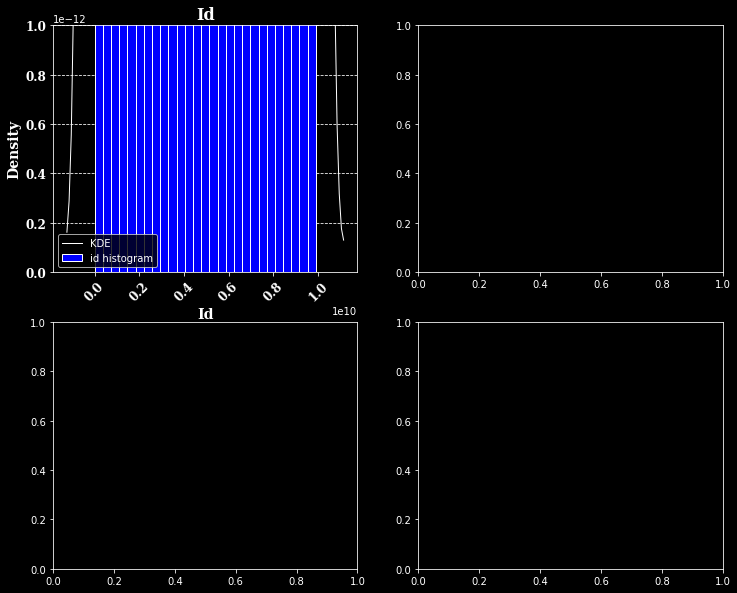

In [41]:
plot_hist_scat_sns(df)

In [ ]:
def plot_df(df,xcol='weight',ycol='mpg',plot_kws={}):
    """Used df.plot(xcol,ycol) and unpacks plot_kws 
    into .plot() method."""
    ax = df.plot(xcol,ycol,**plot_kws)

plot_df(df)

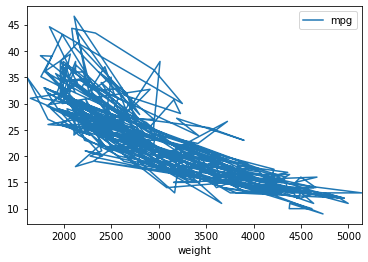

In [48]:
def plot_df(df,xcol='weight',ycol='mpg',plot_kws={}):
    """Used df.plot(xcol,ycol) and unpacks plot_kws 
    into .plot() method."""
    ax = df.plot(xcol,ycol,**plot_kws)

plot_df(df)

In [ ]:
## We can pass in any commands accepted by .plot in our plot_kws
kws = dict(kind='scatter',color='red',ls=':')
plot_df(df,plot_kws=kws)

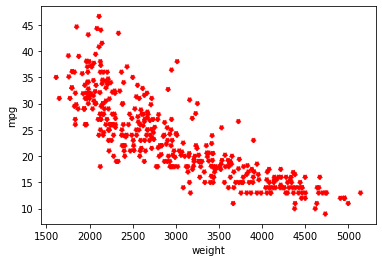

In [49]:
## We can pass in any commands accepted by .plot in our plot_kws
kws = dict(kind='scatter',color='red',ls=':')
plot_df(df,plot_kws=kws)

params.keys:
	 dict_keys(['df', 'xcol', 'ycol', 'plot_kws'])
params['plot_kws'].items:
	 dict_items([('kind', 'scatter'), ('color', 'red'), ('ls', ':')])


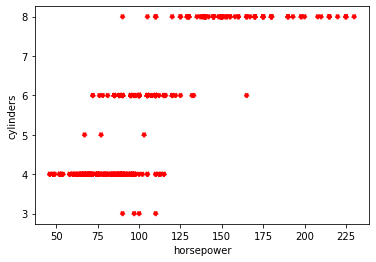

In [50]:
## We can even nest ALL of our arguments into one dictionary
kws = dict(kind='scatter',color='red',ls=':')
params = dict(df=df,
              xcol='horsepower',
              ycol='cylinders',
              plot_kws=kws)

print(f"params.keys:\n\t",params.keys())
print(f"params['plot_kws'].items:\n\t",params['plot_kws'].items())
plot_df(**params)#_df,plot_kws=kws)

### Unpacking dict keys with * 

In [51]:
# Get keys WITH repition
list_ = [*d1,*d2,*d3] 

# Get keys WITHOUT repition
set_ = {*d1,*d2,*d3}
print('list_:',list_,end='\n\n')
print('set_i:',set_,end='\n\n')

list_: ['p', 'y', 't', 'h', 'h', 'o', 'n']

set_i: {'p', 'h', 'n', 't', 'o', 'y'}



## Nested Unpacking

In [52]:
l = [1,2,[3,4]]
print('Startin List=',l)

Startin List= [1, 2, [3, 4]]


In [53]:
## Without Nested Unpacking:
a,b,c = l
print(f"a={a}\nb={b}\nc={c}")#,sep='\n')

a=1
b=2
c=[3, 4]


In [54]:
e,d = c
print(f"\ne={e}\nd={d}")#,sep='\n')


e=3
d=4


In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2)

In [55]:
l = [1,2,[3,4]]

a,b,(c,d) = [1,2, [3,4]]
print(a,b,c,d,sep='\n')

1
2
3
4


# PEEKING UNDER THE HOOD / DEBUGGING

### TOPICS:
- `help` vs `dir`
- `locals()` vs `globals()`
- `inspect` module
- debugging with `pdb` (`pdb.set_trace()`)


### help vs dir

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
help(scaler)

Help on StandardScaler in module sklearn.preprocessing.data object:

class StandardScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using the
 |  `transform` method.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual features do not more or less look like standard normally
 |  distributed data (e.g. Gaussian with 0 mean

In [58]:
scaler.__dict__

{'with_mean': True, 'with_std': True, 'copy': True}

In [57]:
dir(scaler)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_reset',
 'copy',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'partial_fit',
 'set_params',
 'transform',
 'with_mean',
 'with_std']

## Using special methods to control the output of a class

In [62]:
ic==Example

False

In [63]:
isinstance(ic,Example)

True

In [59]:
class Example():
    def __init__(self,ice_cream='vanilla'):
        self.fav=ice_cream
ic= Example()
ic

### `__repr__()` controls display when final element of a cell

In [64]:
class Example():
    def __init__(self,ice_cream='vanilla'):
        self.fav=ice_cream
    def __repr__(self):
        return self.fav

ic = Example()
ic

vanilla

### `__str__()` controls whats displayed when an object is printed

In [65]:
class Example():
    def __init__(self,ice_cream='vanilla'):
        self.fav=ice_cream
    def __repr__(self):
        return self.fav
    def __str__(self):
        return "this is a string"
ic = Example()
print(ic)

this is a string


In [66]:
class Example():
    def __init__(self,ice_cream='vanilla'):
        self.fav=ice_cream
    def __repr__(self):
        return self.fav
    def __str__(self):
        return "this is a string"
ic = Example()
print(ic)
ic

this is a string


vanilla

### Additional Examples of help vs dir

In [67]:
def my_func(a,b):
    return a*b

my_func.category = 'math'
my_func.sub_category = 'arithmetic'
print(my_func.category)

math


In [68]:
help(my_func)

Help on function my_func in module __main__:

my_func(a, b)



In [69]:
dir(my_func)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'category',
 'sub_category']

In [70]:
def my_func_with_kws(a,b,defaults='defined parameters',c=4):
    return a*b

In [71]:
dir(my_func_with_kws)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [74]:
print(my_func_with_kws.__defaults__)

('defined parameters', 4)


In [73]:
print(my_func_with_kws.__name__)

my_func_with_kws


### inspect module

In [43]:
import inspect

inspect.getsource(plot_hist_scat_sns)

'def plot_hist_scat_sns(df, target=\'price\'):\n\n    \n    ## ----------- DEFINE AESTHETIC CUSTOMIZATIONS ----------- ##    # Axis Label fonts    \n    fontTitle = {\'fontsize\': 16,\n               \'fontweight\': \'bold\',\n                \'fontfamily\':\'serif\'}\n\n    fontAxis = {\'fontsize\': 14,\n               \'fontweight\': \'bold\',\n                \'fontfamily\':\'serif\'}\n\n    fontTicks = {\'fontsize\': 12,\n               \'fontweight\':\'bold\', \n                \'fontfamily\':\'serif\'}\n\n    # Formatting dollar sign labels     \n    fmtPrice = \'${x:,.0f}\'\n    tickPrice = mtick.StrMethodFormatter(fmtPrice)\n    \n\n    ## ----------- PLOTTING ----------- ##     \n    ## Loop through dataframe to plot     \n    for column in df.describe():\n\n        # Create figure with subplots for current column        \n        # Note: in order to use identical syntax for large # of subplots (ax[i,j]),         declare an extra row of subplots to be removed later         \n 

In [75]:
import inspect
print(inspect.ismethod(my_func_with_kws))
inspect.isfunction(my_func_with_kws)

False


True

In [76]:
inspect.getsource(my_func_with_kws)

"def my_func_with_kws(a,b,defaults='defined parameters',c=4):\n    return a*b\n"

In [79]:
fs.ihelp(fs.ihelp,False)

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def ihelp(function_or_mod, show_help=True, show_code=True,return_code=False,markdown=True,file_location=False):
    """Call on any module or functon to display the object's
    help command printout AND/OR soruce code displayed as Markdown
    using Python-syntax"""
    import inspect
    
    try:
        from IPython.display import display, Markdown
    except:
        print('[!] IPython was not found.')
        
    page_header = '---'*28
    # footer = '---'*28+'\n'
    if show_help:
        print(page_header)
        banner = ''.join(["---"*2,' HELP ',"---"*24,'\n'])
        print(banner)
        help(function_or_mod)
        # print(footer)
        
    import sys
    if "google.colab" in sys.modules:
        markdown=False

    if show_code:
        print(page_header)

        banner = ''.join(["---"*2,' SOURCE -',"---"*23])
        print(banner)
        try:
            import inspect
            source_DF = inspect.getsource(function_or_mod)

            if markdown == True:
                
                output = "```python" +'\n'+source_DF+'\n'+"```"
                display(Markdown(output))
            else:
                print(source_DF)

        except TypeError:
            pass
            # display(Markdown)


    if file_location:
        file_loc = inspect.getfile(function_or_mod)
        banner = ''.join(["---"*2,' FILE LOCATION ',"---"*21])
        print(page_header)
        print(banner)
        print(file_loc)

    # print(footer)

    if return_code:
        return source_DF

```

In [ ]:
# def get_methods(obj):
#     """ To see availabe methods in pfig"""
#     method_list = [func for func in dir(obj) if callable(getattr(obj, func))]
#     filt_methods = list(filter(lambda x: '_' not in x[0] ,method_list))
#     return  filt_methods

In [ ]:
# get_methods(ax)

# `filter`,`map`


- `map` takes a function and then a list of the variables(iterables like lists,arrays,etc) to pass in as positional arguments to the function being passed

EXAMPLE:
 
```python

def my_func(a,b):
    return a*b

A = [1,2,3]
B = [2,3,4]
list(map(my_func,A,))
```
- filter and map are **iterators**
- wrap in a `list` or similar command to get output

In [ ]:
A = [1,2,3]
B = [2,3,4]
list(map(my_func,A,B))

In [ ]:
def my_str_func(name,color,*args):
    print(f"Hello! My name is {name}.")
    print(f"My favorite color is {color}")
    print(f"A list of my favorite things:")
    # print(*args,sep='\n')
    [print('- ',arg) for arg in args]
    print('\n'*3)

    # print(args[1])

In [ ]:

name = 'James'
color = 'purple'

fav1='Raindrops on roses'
fav2='And whiskers on kittens'
fav3='Bright copper kettles and warm woolen mittens'
fav4='Brown paper packages tied up with string'
fav5='These are a few of my favorite things'

# my_favorite_things = my_favorite_things.split('\n')
my_str_func(name,color,fav1,fav2,fav3,fav4,fav5)

In [ ]:
names = ['james','ben']
colors = ['purple','blue']

james_favs= [fav1,fav3,fav5]
bens_favs = [fav2,fav5,fav5]

favs = [james_favs,bens_favs]
favs

In [ ]:
mapper = map(my_str_func,names,colors,*favs)
mapper

In [ ]:
list(mapper)

In [ ]:
## filter example
roses_things = []
for fav in james_favs:
    if 'roses' in fav:
        roses_things.append(fav)
roses_things

In [ ]:
list(filter(lambda x: 'roses' in x, james_favs))

In [ ]:
np.isnan

### Sidebar: in pandas, using `.apply` vs `.map`

In [ ]:
# df2=df.copy()
def calc_combined(row):
    row['combined']= (row['bedrooms']+row['bathrooms']) * row['floors']
    return row
# df2.apply(calc_combined,axis=1)

def fix_yr_reno(x):
    
    if np.isnan(x):
        return 'Missing'
    else:
        return (str(x))
    

df['yr_reno_str']  = df['yr_renovated'].apply(fix_yr_reno)
df

In [ ]:
vals = df['condition'].unique()
new_vals = ['a',3,'6',1,2]
mapper = dict(zip(vals,new_vals))
mapper

In [ ]:
df['condition'].map(mapper)
df['condition'].apply(lambda x: mapper[x])

In [ ]:
def my_func(x):
    return str(x)
df2.apply(my_func)

# Closures / `__call__()`

- What is a closure?
    - A closure is a bubble/pen of code that includes any functions and free variables contained therein

In [81]:
from time import perf_counter

help(perf_counter)

Help on built-in function perf_counter in module time:

perf_counter(...)
    perf_counter() -> float
    
    Performance counter for benchmarking.



In [89]:
from time import perf_counter

class Timer:
    def __init__(self):
        self.start = perf_counter()
    def poll(self):
        return perf_counter()-self.start
    def reset(self):
        self.start= perf_counter()


In [83]:
t1 = Timer()

In [84]:
t1.poll()

5.523788975999196

In [85]:
t1.poll()

9.227449792999323

In [87]:
t1.reset()
t1.poll()

3.1304000003729016e-05

In [95]:
from time import perf_counter

class Timer:
    def __init__(self):
        self.start = perf_counter()
    def poll(self):
        return perf_counter()-self.start
    def reset(self):
        self.start= perf_counter()
    def __call__(self):
        return self.poll()

In [96]:
t2 = Timer()
t2

In [97]:
t2()

0.4552398939995328

In [100]:
t2()

11.376860485999714

In [102]:
## Closure version
def timer():
    from time import perf_counter
    import time
    start = perf_counter()
    def poll():
        return perf_counter()-start
    return poll

In [103]:
t3 = timer()

In [105]:
t3()

14.50267983699996

In [106]:
t3()

18.757430502000716

In [107]:
t3()

26.695219622000877

In [108]:
t4=timer()
print(t4())
print(t3())

3.4188999052275904e-05
102.50718332799988


# DECORATORS

- Decorator functions:
    - take a function as an arugment
    - returns a closure
    - closure accepts any 
    - combination of parameters
    - closure function calls original function using the arguments passed to closure
    - returns whatever is outputed by the function call
    


`@` is a decorator operator, but you do not technically need to use to do decorator

### @interact

In [109]:
df = fs.datasets.load_mod1_proj()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [110]:
df = df.drop(columns=['date','sqft_basement'])

In [112]:
fs.ihelp_menu(fs.ihelp)

GridBox(box_style='warning', children=(VBox(children=(Label(value='iHelp Menu: View Help and/or Source Code'),…

Output()

In [113]:
from ipywidgets import interact

cols = df.columns

@interact
def scatter(x=df.columns,y='price',Example=False):
    df.plot(kind='scatter',x=x,y=y)

interactive(children=(Dropdown(description='x', options=('id', 'price', 'bedrooms', 'bathrooms', 'sqft_living'…

## ACTIVITY: Writing a decorator

In [116]:
def inner(*args,**kwargs):
    print(len(args),len(kwargs))
    
inner(3,5,7,8,cat='dog',weird=True)


4 2


In [120]:
def timed(fn):
    from time import perf_counter
    
    def inner(*args,**kwargs):
        start = perf_counter()
        
        result = fn(*args, **kwargs)
        
        end = perf_counter()
        elapsed = end-start
        
        arg_str = [str(a) for a in args]
        kwarg_str = [f"{k}={v}" for  k,v in kwargs.items()]
        
        all_args = arg_str + kwarg_str
        args_str_out = ','.join(all_args)
        
        print(f"{fn.__name__}({args_str_out}) took {elapsed:.6f}")
        return result
    return inner


In [124]:
# @timed
def calc_recursive_fib(n):
    """Calcs a recursive fib seqeuence based on n"""
    if n<=2:
        return 1
    else:
        return calc_recursive_fib(n-1)+calc_recursive_fib(n-2)

In [125]:
help(calc_recursive_fib)

Help on function calc_recursive_fib in module __main__:

calc_recursive_fib(n)
    Calcs a recursive fib seqeuence based on n



In [126]:
@timed
def calc_recursive_fib(n):
    """Calcs a recursive fib seqeuence based on n"""
    if n<=2:
        return 1
    else:
        return calc_recursive_fib(n-1)+calc_recursive_fib(n-2)
help(calc_recursive_fib)

Help on function inner in module __main__:

inner(*args, **kwargs)



In [122]:
calc_recursive_fib(4)

calc_recursive_fib(2) took 0.000001
calc_recursive_fib(1) took 0.000000
calc_recursive_fib(3) took 0.000057
calc_recursive_fib(2) took 0.000001
calc_recursive_fib(4) took 0.001021


3

### `functools.wraps` to solve decorated function identity issues


In [127]:
def timed(fn):
    from time import perf_counter
    from functools import wraps
    
    @wraps(fn)
    def inner(*args,**kwargs):
        start = perf_counter()
        
        result = fn(*args, **kwargs)
        
        end = perf_counter()
        elapsed = end-start
        
        arg_str = [str(a) for a in args]
        kwarg_str = [f"{k}={v}" for  k,v in kwargs.items()]
        
        all_args = arg_str + kwarg_str
        args_str_out = ','.join(all_args)
        
        print(f"{fn.__name__}({args_str_out}) took {elapsed:.6f}")
        return result
    return inner


In [128]:
@timed
def calc_recursive_fib(n):
    """Calcs a recursive fib seqeuence based on n"""
    if n<=2:
        return 1
    else:
        return calc_recursive_fib(n-1)+calc_recursive_fib(n-2)
help(calc_recursive_fib)

Help on function calc_recursive_fib in module __main__:

calc_recursive_fib(n)
    Calcs a recursive fib seqeuence based on n



# APPENDIX

## Special Class Methods  (@staticmethod, @property,etc)
- Demo EncryptedPassword class using @property 

#### Some special decorators used in classes.

1. `@staticmethod`:
    - Defines a method that does not get passed `self` when its called and can act on external code as if it was a function, not a "`bound method`"
2. `@classmethod`:
    - Specifies a method that should always refer to the default method spelled out in the class definition, NOT the version of it that is stored inside the **instance** of a method.
3. `@property`: (see example class `EncryptedPassword` below.)
    - Specifies that a function is going to determine the value of the `class.property`:
    - Essentially replaces the property name with a getter function to determine that value.
    - Use '@property.setter' above another function to define it as the setter function. 

In [129]:
class EncryptedPassword():
    """Class that can be used to either provide a password/username to be encrypted 
    OR to load a previously encypted password from file.    
    NOTE: Once you have encrypted your password and saved to bin files, you do not need to provide the password again. 
    Make sure to delete your password from the notebook after. 
    - If encrypting a password, a key file and a password file will be saved to disk. 
        - Default Key Filename: '..\\encryption_key.bin',
        - Default Password Filename: '..\\encrypted_pwd.bin'
        - Default Username Filename: '..\\encrypted_username.bin'
    
    The string representations of the unencrypted password are shielded from displaying, when possible. 
    


    - If opening and decrypting key and password files, pass filenames during initialization. 
    
    
    Example Usage:
    >> # To Encrypt, with default folders:
    >> my_pwd EncryptedPassword('my_password')
    
    >> # To Encrypt With custom folders
    >> my_pwd = EncryptedPassword('my_password',filename_for_key='..\folder_outside_repo\key.bin',
                                    filename_for_password = '..\folder_outside_repo\key.bin')
                                    
                                    
    >> # To open and decrypt files (from default folders):
    >> my_pwd = EncryptedPassword(from_file=True)
    
    >> # To open and decrypt files (from custom folders):
    >> my_pwd = EncryptedPassword(from_file=True, 
                                filename_for_key='..\folder_outside_repo\key.bin',
                                filename_for_password = '..\folder_outside_repo\key.bin')
                                    
        
    """
    
    ## Default username
    username = 'NOT PROVIDED'
    
    ## the .password property is designed so it will not display an unencrypted password. 
    @property ## password getter 
    def password(self):
        # if the encrypyted password already exists, print the encrypted pwd (unusable without key)
        if hasattr(self,'_encrypted_password_'):
            print('Encrypted Password:')
            return self._encrypted_password_
        else:
            raise Exception('Password not yet encrypted.')
    
    ## the .password property cannot be set by a user
    @password.setter ## password setter
    def password(self,password):
        raise Exception('.password is read only.')
        
               
    ## 
    def __init__(self,username=None,password=None,from_file=False, encrypt=True,
                filename_for_key='..\\encryption_key.bin',
                filename_for_password='..\\encrypted_pwd.bin',
                filename_for_username = '..\\encrypted_username.bin'):
        """Accepts either a username and password to encyrypt, 
        or loads a previously encrypyed password from file.
        
        Args:
            username (str): email username.
            password (str): email password (note: if have 2-factor authentication on email account, 
                will need app-specific password).
            from_file (bool): whether to load the user credentials from file
            encrypt (bool): whether to encrypt provided password. Default=True
            
            filename_for_key (str): filepath for key.bin (default is'..\\encryption_key.bin')
            filename_for_password: filepath for password.bin (default is'..\\encryption_pwd.bin')
            filename_for_username: filepath for username.bin (default is'..\\encrypted_username.bin')
            """
        
        ## Save filenames 
        self.filename_for_key = filename_for_key
        self.filename_for_password = filename_for_password
        self.filename_for_username = filename_for_username
        
        ## If user passed a username, set username
        if username is not None:
            self.username = username
        
        ## If no password is provided:
        if (password is None):
            
            ##  if load from file if `from_file`=True
            if (from_file==True):
                
                try: ## Load in the key, password, username files
                    self.load_from_file(key_filename=filename_for_key,
                                    password_filename=filename_for_password,
                                        username_filename=filename_for_username)
                except:
                    raise Exception('Something went wrong. Do the key and password files exist?')
            
            ## If no password provided, and from_file=False, raise error
            else:
                raise Exception('Must either provide a password to encrypt, or set from_file=True')
        
        
        ## If the user DOES provide a password
        else:
            self._password_ = password # set the private attribute for password
            
            ## Encrypt the password
            if encrypt:
                self.encrypt_password()
                
                
    def encrypt_password(self, show_encrypted_password=False):
        """Encrypt the key, username, and password and save to external files."""
         ## Get filenames to use.
        filename_for_key= self.filename_for_key
        filename_for_password=self.filename_for_password
        filename_for_username = self.filename_for_username

        ## Import cryptography and generate encryption key
        from cryptography.fernet import Fernet
        key = Fernet.generate_key()
        self._key_ = key

        ## Create the cipher_suit from key for encrypting/decrypting
        cipher_suite = Fernet(key)
        self._cipher_suite_ = cipher_suite
 
        ## ENCRYPT PASSWORD
        # Get password and change to byte encoding
        password = self._password_
        password_to_encrypt = bytes(password,'utf-8') #password must be in bytes format
        
        # Use the encryption suite to encrypt the password and save to self
        ciphered_pwd = cipher_suite.encrypt(password_to_encrypt)
        self._encrypted_password_ = bytes(ciphered_pwd).decode('utf-8')
        
        # Print encrypyted password if true
        if show_encrypted_password:
            print('Encrypyted Password:')
            print(self._encrypted_password_)
        
        
        ## ENCRYPT USERNAME
        username = self.username
        username_to_encrypt = bytes(username,'utf-8')
        ciphered_username = cipher_suite.encrypt(username_to_encrypt)
        self._encrypted_username_ = bytes(ciphered_username).decode('utf-8')
        
        ## TEST DECRYPTION
        # decrypt password and username
        unciphered_pwd = cipher_suite.decrypt(ciphered_pwd)
        unciphered_username = cipher_suite.decrypt(ciphered_username)
        
        ## Decode from bytes to utf-8
        password_decoded = unciphered_pwd.decode('utf-8')
        username_decoded = unciphered_username.decode('utf-8')
        
        # Check if decoded text matches input text
        check_pwd = password_decoded==password
        check_user = username_decoded==username
        
        ## If everything matches, warn user to delete their exposed password
        if  check_pwd & check_user:
            self._password_ = password_decoded 
            print('[!] Make sure to delete typed password above from class instantiation.')
        else:
            raise Exception('Decrypted password and input password/username do not match. Something went wrong.')

        ## SAVE KEY, PASSWORD, AND USERNAME TO BIN FILES
        ## Specify binary files (outside of repo) for storing key and password files
        with open(filename_for_key,'wb') as file:
            file.write(key)

        with open(filename_for_password,'wb') as file:
            file.write(ciphered_pwd)
            
        with open(filename_for_username,'wb') as file:
            file.write(ciphered_username)

        # Display filepaths for user.
        print(f'[io] Encryption Key saved as {filename_for_key}')
        print(f'[io] Encrypted Password saved as {filename_for_password}')
        print(f'[io] Encrypted Username saved as {filename_for_username}')

            
    
    def load_from_file(self,key_filename,password_filename,
                      username_filename):
        """Load in the encrypted password from file. """
        
        from cryptography.fernet import Fernet
        
        ## Load Key 
        with open(key_filename,'rb') as file:
            for line in file:
                key = line

        ## Make ciphere suite from key
        cipher_suite = Fernet(key)
        self._cipher_suite_ = cipher_suite

        ## Load password
        with open(password_filename,'rb') as file:
            for line in file:
                encryptedpwd = line
        self._encrypted_password_ = encryptedpwd
        
        ## Decrypt password
        unciphered_text = (cipher_suite.decrypt(encryptedpwd))
        plain_text_encrypted_password = bytes(unciphered_text).decode('utf-8')
        self._password_ = plain_text_encrypted_password
        
        ## Load username
        with open(username_filename,'rb') as file:
            for line in file:
                username = line
        unciphered_username = (cipher_suite.decrypt(username))
        plan_text_username = bytes(unciphered_username).decode('utf-8')
        self.username = plan_text_username
        
    def __repr__(self):
        """Controls the printout when the object is the final command in a cell.
        i.e:
        >> pwd =EncrypytedPassword(username='me',password='secret')
        >> pwd
        """
        password = self._password_
        msg = f'[i] Password is {len(password)} chars long.'
        return msg

    def __str__(self):
        """Controls the printout when the object is printed.
        i.e:
        >> pwd =EncrypytedPassword(username='me',password='secret')
        >> print(pwd)
        """
        password = self._password_
        msg = f'[i] Password is {len(password)} chars long.'
        return msg 

In [130]:
enc = EncryptedPassword('','')
enc.password

[!] Make sure to delete typed password above from class instantiation.
[io] Encryption Key saved as ..\encryption_key.bin
[io] Encrypted Password saved as ..\encrypted_pwd.bin
[io] Encrypted Username saved as ..\encrypted_username.bin
Encrypted Password:


'gAAAAABeD4U1_uIf-dnhmb6wE_uvH8erL4R50E289YU4uTJBg7dZrrrEF8lIs2WTdqh0DxLhsBNhJh34vxNJLEx4WwiNgLy95Q=='

In [131]:
enc.password = 'bob'

Exception: .password is read only.

## Operators

- Table extracted from https://www.programiz.com/python-programming/operators

|Operator|Meaning | 	Example|
| --- | --- | --- |
|+ |	Add two operands | x + y|
|-	| Subtract right operand from the left |	x - y|
|*	| Multiply two operands	| x * y|
|/ |	Divide left operand by the right one (always results into float) |	x / y|
|%	| Modulus - remainder of the division of left operand by the right	| x % y (remainder of x/y)|
|//	| Floor division - division that results into whole number adjusted to the left in the number line	x |// y|
|**	| Exponent - left operand raised to the power of right|	x**y (x to the power y)|
|>	| Greater than - True if left operand is greater than the right|	x > y|
|<	| Less than - True if left operand is less than the right	|x < y|
|== |	Equal to - True if both operands are equal|	x == y|
|!= |	Not equal to - True if operands are not equal	|x != y|
|>=	| Greater than or equal to - True if left operand is greater than or equal to the right	|x >= y|
|<=	| Less than or equal to - True if left operand is less than or equal to the right|	x <= y|

## NOTES RE WRITING FUNCTIONS


- We did not have as much of a structured example for this secrtion, but we did spend some time going over parts of this [colab notebook on functions and classes](https://colab.research.google.com/drive/1yFxbdbNGdG2iVCyd52Wg8RADa7g9KzZ3#scrollTo=UzoyQIMRlKQL)

**Functions**:
- try,except,finally
- raising Exceptions
- assertions


- Using `verbose` to control outputs:
    - `verbose=0,1,2`
    - `if verbose: display(...)`
- Using `isinstance` vs `type`


**1. `try,except,finally`**
```python
try:
    some_func_that_may_error(inputs)
except:
    what_to_do_when_error_happens
    # note: good place to print type, shape, etc. to help diagnose errors
finally: #optional
    run_this_code_no_matter_what
```
- Note: **if you don't want anything to happen** if there's an error, then just make `except:` be a `pass` command.
    
```python
try:
    some_func_that_may_error(inputs)
except:
    
    msg = f"the shape was {inputs.shape}"
    raise Exception(msg)
    pass

```
- Additionally, you can specify what TYPE of errors to handle:
    
```python
try: 
    function_that_calls_a_var(data=my_var) # if my_var doesn't exist, will raise a `NameError`
except NameError:
    my_var = func_to_create_var()
```

In [ ]:
a=1
b='c'
try:
    b>a
except Exception as e:
    print(e)
finally:
    print("see it worked!")

**2. raising Exceptions:**
    - You can write your own errors + error msgs in your function
    - This is helpful for giving the user specific information as to how to resolve the error.
    
    
```python
def my_func(arg1, arg2,option_1=True, option_2=False, option_3=False):
    """Function takes arg1, arg2 and then processes it according to which
    option==True. """
    
    # check if >1 parameter is True:
    if np.sum([option_1, option_2,option_3])>1: 
        raise Exception('Only 1 of option_1,option_2,option_3 may be True')
    ...
```

**3. Using verbose**

    - a general practice is to specify verbosity as 0,1,2.
        - 0 being little-to-no details, 1 being more, 2 being the most details.
    - Can be very good for troubleshooting or for print outs that provde/demonstrate what the function did/generated.
    
```python
def my_func(arg1,arg2,verbose=1):
   if verbose: # if verbose==either 1 or 2
        print(arg1.shape,arg2.shape)
    ...
    
```

**4. Using `isinstance` instead of `type==`:**

- Using `type(var)==class_you_want` is not very helpful
    - There's a lot of types that it will not recognize
    - There's an entire `types` module you could import into Python
- What's better is using `isinstance(var_youre_checking,'list')`

```python
if isinstance(my_var,'list'):
    do_this_stuff...

# Note, for types from outside packages, you will need to reference the class in the library.

import pandas as pd
if isinstance(my_var, pd.DataFrame):
    do_this_stuff...
```
- What nice about using this in your functions is that **you can code-in the correct way of handling the input to make it compatible** with the rest of your function, instead of just raising an Error.

i.e. User inputs a single string or a Series instead of a list of strings:
```python
import pandas as pd
if isinstance(input_var,'list') == False:
    
    if isinstance(input_var,'str'):
        input_var = [input_var]
    elif isinstance(input_var, pd.Series):
        input_var=list(input_var)
        
    ## Now input_var should be in list form and you can loop like normal
    for entry in input_var:
        ...
```

### Warning Re: Functions & Inplace Operations

- Avoid performing `inplace` operations if you are planing to `return` the output of the inplace operation.

- The returned object will be exactly the same one as your input object. It will NOT be a copy.